In [20]:
import time
import subprocess
import matplotlib.pyplot as plt
import psutil
import compiler as cp


In [17]:
vm_programs = ["./build/thd_vm_routine", "./build/thd_vm_indirect", "./build/thd_vm_direct"]


In [4]:
def run_vm_benchmark(vm_program, vm_code):
    cp.binary(vm_code)
    process = subprocess.Popen([vm_program,"--benchmark","program.bin"], 
                               stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    start_time = None
    while True:
        line = process.stdout.readline()
        if not line:
            break
        print(line, end='')  
        if "Preprocessing completed, starting benchmark..." in line:
            start_time = time.time()
    process.wait()
    end_time = time.time()
    return end_time - start_time if start_time else None

Preprocessing completed, starting benchmark...
55
Preprocessing completed, starting benchmark...
55
Preprocessing completed, starting benchmark...
55
Preprocessing completed, starting benchmark...
5050
Preprocessing completed, starting benchmark...
5050
Preprocessing completed, starting benchmark...
5050
Preprocessing completed, starting benchmark...
500500
Preprocessing completed, starting benchmark...
500500
Preprocessing completed, starting benchmark...
500500
Preprocessing completed, starting benchmark...
50005000
Preprocessing completed, starting benchmark...
50005000
Preprocessing completed, starting benchmark...
50005000
Preprocessing completed, starting benchmark...
705082704
Preprocessing completed, starting benchmark...
705082704
Preprocessing completed, starting benchmark...
705082704
Preprocessing completed, starting benchmark...
1784293664
Preprocessing completed, starting benchmark...
1784293664
Preprocessing completed, starting benchmark...
1784293664
Preprocessing compl

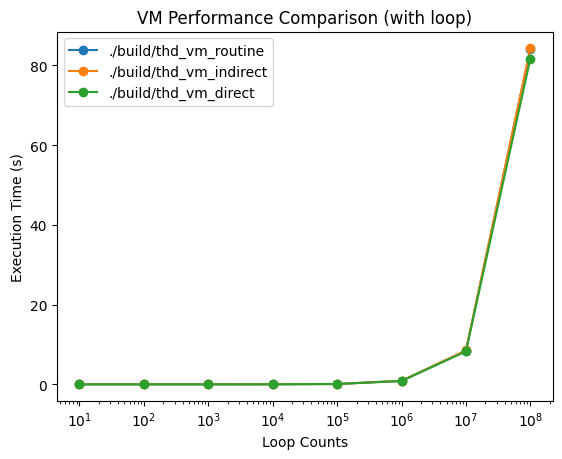

In [5]:
loop_counts = [10, 100, 1000, 10000, 100000,1000000,10000000,100000000]
execution_times = {vm: [] for vm in vm_programs}
vm_code_template = "DT_IMMI,0,DT_STO_IMMI,0,1,DT_LOD,0,DT_ADD,DT_LOD,0,DT_INC,DT_STO,0,DT_LOD,0,DT_IMMI,{loop_count},DT_GT,DT_JZ,5,DT_PRINT,DT_END"
for count in loop_counts:
    vm_code = vm_code_template.format(loop_count=count)
    for vm_program in vm_programs:
        exec_time = run_vm_benchmark(vm_program, vm_code)
        if exec_time is not None:
            execution_times[vm_program].append(exec_time)
for vm_program, times in execution_times.items():
    plt.plot(loop_counts, times, marker='o', label=vm_program)
plt.xscale('log')
plt.xlabel('Loop Counts')
plt.ylabel('Execution Time (s)')
plt.title('VM Performance Comparison (with loop)')
plt.legend()
plt.show()

In [6]:
print(execution_times)

{'./build/thd_vm_routine': [0.0006809234619140625, 0.0003192424774169922, 0.0014319419860839844, 0.011687994003295898, 0.08392071723937988, 0.8740308284759521, 8.393460988998413, 84.15249800682068], './build/thd_vm_indirect': [0.000843048095703125, 0.0002281665802001953, 0.0014100074768066406, 0.01018524169921875, 0.08339476585388184, 0.8728587627410889, 8.516459941864014, 84.30601215362549], './build/thd_vm_direct': [0.00019598007202148438, 0.00020813941955566406, 0.0013239383697509766, 0.009125709533691406, 0.0817708969116211, 0.8310577869415283, 8.273093938827515, 81.70772290229797]}


Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing

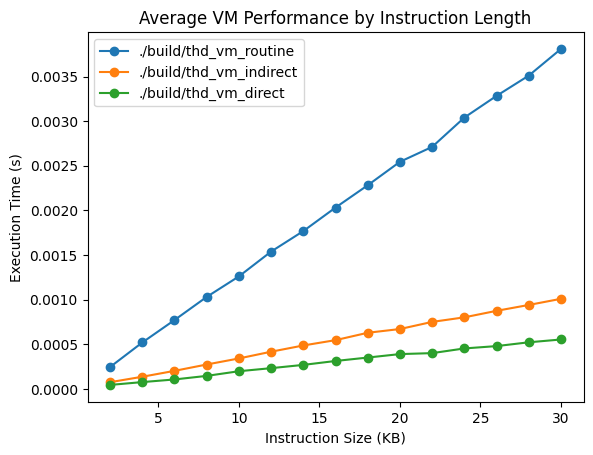

In [7]:
sizes_kb = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20,22,24,26,28,30]
instruction_size = 4
num_repeats = 20
execution_times = {vm: [] for vm in vm_programs}
for size_kb in sizes_kb:
    num_instructions = (size_kb * 1024) // instruction_size
    vm_code = "DT_IMMI,1," * num_instructions
    vm_code = vm_code.rstrip(',')
    for vm_program in vm_programs:
        repeat_times = []
        for _ in range(num_repeats):
            exec_time = run_vm_benchmark(vm_program, vm_code)
            if exec_time is not None:
                repeat_times.append(exec_time)
        average_time = sum(repeat_times) / len(repeat_times)
        execution_times[vm_program].append(average_time)

for vm_program, times in execution_times.items():
    plt.plot(sizes_kb, times, marker='o', label=vm_program)

plt.xlabel('Instruction Size (KB)')
plt.ylabel('Execution Time (s)')
plt.title('Average VM Performance by Instruction Length')
plt.legend()
plt.show()

Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing completed, starting benchmark...
Preprocessing

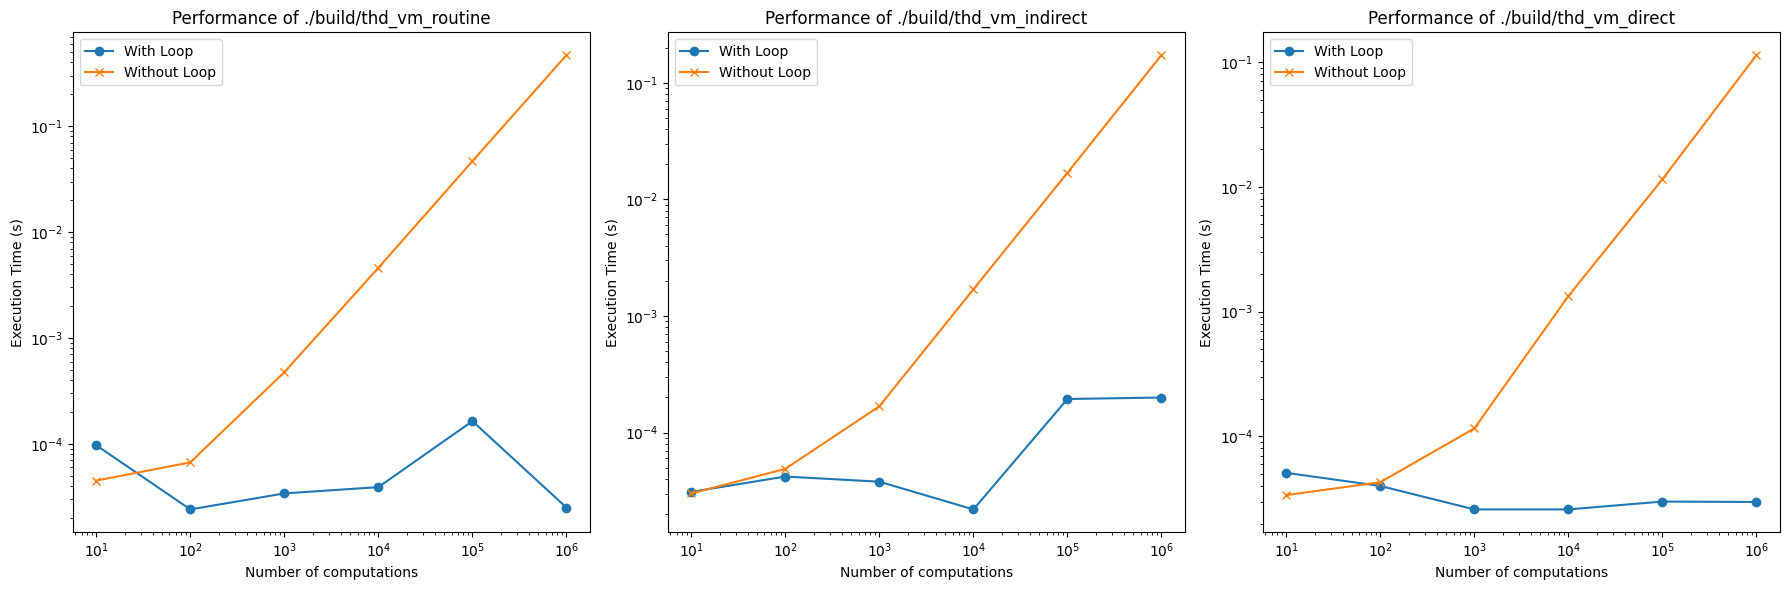

In [8]:
loop_counts = [10,100, 1000, 10000, 100000,1000000]
execution_times = {vm: {'with_loop': [], 'without_loop': []} for vm in vm_programs}

for count in loop_counts:
    loop_code = f"DT_IMMI,0,DT_STO_IMMI,0,1,DT_LOD,0,DT_INC,DT_STO,0,DT_LOD,0,DT_IMMI,{count},DT_LT,DT_JZ,5,DT_END"
    no_loop_code = "DT_IMMI,1,"+"DT_INC," * count + "DT_END"
    for vm_program in vm_programs:
        execution_times[vm_program]['with_loop'].append(run_vm_benchmark(vm_program, loop_code))
        execution_times[vm_program]['without_loop'].append(run_vm_benchmark(vm_program, no_loop_code))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for i, vm_program in enumerate(vm_programs):
    axes[i].plot(loop_counts, execution_times[vm_program]['with_loop'], marker='o', label='With Loop')
    axes[i].plot(loop_counts, execution_times[vm_program]['without_loop'], marker='x', label='Without Loop')
    axes[i].set_xlabel('Number of computations')
    axes[i].set_ylabel('Execution Time (s)')
    axes[i].set_title(f'Performance of {vm_program}')
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [9]:
print(execution_times)

{'./build/thd_vm_routine': {'with_loop': [9.703636169433594e-05, 2.4080276489257812e-05, 3.409385681152344e-05, 3.910064697265625e-05, 0.000164031982421875, 2.5033950805664062e-05], 'without_loop': [4.506111145019531e-05, 6.699562072753906e-05, 0.0004761219024658203, 0.004603147506713867, 0.04678511619567871, 0.469620943069458]}, './build/thd_vm_indirect': {'with_loop': [3.0994415283203125e-05, 4.1961669921875e-05, 3.790855407714844e-05, 2.193450927734375e-05, 0.00019407272338867188, 0.00019979476928710938], 'without_loop': [3.0040740966796875e-05, 4.887580871582031e-05, 0.00016808509826660156, 0.0016939640045166016, 0.016899824142456055, 0.17277193069458008]}, './build/thd_vm_direct': {'with_loop': [5.1021575927734375e-05, 4.00543212890625e-05, 2.5987625122070312e-05, 2.5987625122070312e-05, 3.0040740966796875e-05, 2.9802322387695312e-05], 'without_loop': [3.3855438232421875e-05, 4.291534423828125e-05, 0.00011587142944335938, 0.0013349056243896484, 0.011512041091918945, 0.113909006118

In [21]:
# Function to run a VM and capture its output
def run_virtual_machine(vm_command):
    # Using a pipe to capture the subprocess's stdout
    return subprocess.Popen(vm_command, stdout=subprocess.PIPE, shell=True, text=True)

# Function to monitor VM execution
def monitor_execution(proc, interval=1,period = 1 , duration=10):
    start_time = time.time()
    tik_counts = []
    total_tiks = 0

    while time.time() - start_time < duration:
        line = proc.stdout.readline()  # Read a line of output
        if line:
            if "tik" in line:
                total_tiks += 1
        current_time = time.time()
        if current_time - start_time >= interval:
            tik_counts.append(total_tiks)
            interval += period  # Update the time for the next 10-minute interval

    proc.terminate()
    return tik_counts

# Recording the execution data for each VM program
vm_data = {}
vm_code_template = "DT_JMP,0"
cp.binary(vm_code_template)
for vm_program in vm_programs:
    print(f"Running {vm_program}...")
    vm_proc = subprocess.Popen([vm_program,"program.bin"], 
                               stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    tiks_over_time = monitor_execution(vm_proc)
    vm_data[vm_program] = tiks_over_time
    print(f"{vm_program} tik counts: {tiks_over_time}")

# Plotting the data
for vm_program, tiks in vm_data.items():
    plt.plot([i * 10 for i in range(len(tiks))], tiks, label=vm_program)

plt.xlabel('Time (minutes)')
plt.ylabel('TIK Count')
plt.title('TIK Counts over Time for VM Programs')
plt.legend()
plt.show()

Running ./build/thd_vm_routine...


KeyboardInterrupt: 